# 第4章: 形態素解析
夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [4]:
import MeCab
import unidic
import re
from janome.tokenizer import Tokenizer

In [5]:
! sed 's/\r$//g' neko.txt | mecab > neko.txt.mecab

sed: neko.txt: No such file or directory


In [8]:
t = Tokenizer()

with open("data/neko.txt", "r") as f:
    text = f.read()
    
w = open("neko.janome.txt", "w")

lines = text.split()

result = list()

for line in lines:
    toklist = t.tokenize(line)
    for l in toklist:
        morpehene = {
            "surface" : l.surface,
            "base" : l.base_form,
            "pos" : l.part_of_speech.split(",")[0],
            "pos1" : l.part_of_speech.split(",")[1]
            }
        result.append(morpehene)
print(result[:10])

[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}, {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}, {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}, {'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'}]


In [ ]:
tagger = MeCab.Tagger()

with open('neco.txt', 'r') as fin:
  text = fin.read()

with open('neco.txt.mecab', 'w') as fout:
  fout.write(tagger.parse(text))

In [ ]:
f = open("neco.txt.mecab", "r")
df = f.read()
sentense_list = df.split("\n")
result = list()
# EOSがどうやっても取り除けなくてエラー吐きまくったのでEOSを含む行を読み込まない
for sentense in sentense_list[:-2]:
    surface, data_str = sentense.split("\t")
    if surface == "\u3000":
        continue
    data = data_str.split(",")
    #print(surface)
    #print(data)
    # 解析ミスで形態素解析ができていない単語があったのでエスケープ
    if len(data) < 7:
        continue
    morpeheme = {
        "surface" : surface,
        "base" : data[7],
        "pos" : data[0],
        "pos1" : data[1]
    }
    #print(morpeheme)
    #print(counter)
    #counter += 1
    result.append(morpeheme)
print(result[:30])

## 31.動詞
動詞の基本形を全て抽出せよ。

In [9]:
# pos,pos1が動詞の場合にsetに放り込む
verb = list()
for morpheme in result:
    if morpheme["pos"] == "動詞" or morpheme["pos1"] == "動詞":
        verb.append(morpheme["surface"])
print(verb[:10])

['生れ', 'つか', 'し', '泣い', 'し', 'いる', '始め', '見', '聞く', '捕え']


## 32.動詞の基本形
動詞の基本形をすべて抽出せよ。

In [12]:
# pos,pos1が動詞の場合にsetに放り込む
verb = list()
for morpheme in result:
    if morpheme["pos"] == "動詞" or morpheme["pos1"] == "動詞":
        verb.append(morpheme["base"])
print(verb[:10])

['生れる', 'つく', 'する', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える']


## 33.「AのB」
２つの名詞が「の」で連結されている名詞句を抽出せよ

In [13]:
line_count = len(result)
noun_link_list = list()
for i in range(1,line_count):
    if result[i]["surface"] == "の":
        if result[i-1]["pos"] == "名詞" or result[i-1]["pos1"] == "名詞":
            if result[i+1]["pos"] == "名詞" or result[i+1]["pos1"] == "名詞":
                noun_link_list.append([result[i-1]["surface"],result[i+1]["surface"]])
print(noun_link_list[:10])

[['彼', '掌'], ['掌', '上'], ['書生', '顔'], ['はず', '顔'], ['顔', '真中'], ['穴', '中'], ['書生', '掌'], ['掌', '裏'], ['何', '事'], ['肝心', '母親']]


## 34.名詞の連接
名詞の連接(連続して出現する名詞)を最長一致で抽出せよ

In [14]:
noun_list = list()
max_num = 0
for i in range(line_count):
    if result[i]["pos"] == "名詞" or result[i]["pos1"] == "名詞":
        noun_sen = result[i]["surface"]
        c_num = 1
        while result[i+c_num]["pos"] == "名詞" or result[i+c_num]["pos1"] == "名詞":
            c_num += 1
            noun_sen += " " + result[i+c_num]["surface"]
        max_num = max(max_num, c_num) 
        i += c_num
        noun_list.append(noun_sen)
        #print(noun_sen)
print(max_num)
print(noun_list[:10])

10
['一 は', '吾輩', '猫', '名前', 'どこ', '見当', '何', '所', 'ニャーニャー', 'いた事']


## 35.単語の出現頻度
文章中に出現する単語とその出現頻度を求め、出現頻度の高い順に並べよ

In [20]:
f = open("data/ans35.txt", "w")
word_freq = {}
for i in result:
    if i["surface"] not in word_freq:
        word_freq[i["surface"]] = 1
    else:
        word_freq[i["surface"]] += 1
        
word_freq = dict(sorted(word_freq.items(), key=lambda x:x[1], reverse=True))
for word, counter in list(word_freq.items()):
    f.write(word+"\t"+str(counter)+"\n")
f.close()

In [21]:
cat data/ans35.txt | head -n 5

の	9194
。	7486
て	6865
、	6772
は	6420
cat: stdout: Broken pipe


## 36.頻度上位10語
出現頻度の高い10語とその出現頻度をグラフ(例えば棒グラフなど)表示せよ。

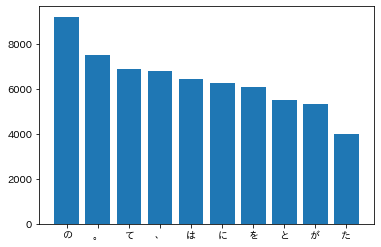

In [46]:
import matplotlib.pyplot as plt
import japanize_matplotlib

x = list()
for i in range(1,11):
    x.append(i)
top10_word = list()
top10_count = list()
for word, counter in list(word_freq.items())[:10]:
    top10_word.append(word)
    top10_count.append(counter)
plt.bar(x, top10_count, tick_label=list(top10_word))
plt.show()

## 37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [24]:
f = open("data/ans37.txt", "w")
sentence = list()
set_sentence = list()
neco_frag = False
for i in result:
    if i["pos"] in {'名詞', '動詞', '形容詞', '副詞'} and i["base"] != "猫":
        sentence.append(i["base"])
    if i["base"] == "猫":
        neco_frag = True
    if i["base"] == "。":
        sentence.append(neco_frag)
        neco_frag = False
        set_sentence.append(sentence)
        sentence = []

neco_counter = dict()

# 猫がある文章は[-1]はTrue
for i in set_sentence:
    if i[-1] == True:
        for l in i[:-1]:
            if l not in neco_counter:
                neco_counter[l] = 1
            else:
                neco_counter[l] += 1
                
neco_counter = dict(sorted(neco_counter.items(), key=lambda x:x[1], reverse=True))
for word, counter in list(neco_counter.items()):
    f.write(word+"\t"+str(counter)+"\n")
f.close()

In [25]:
cat data/ans37.txt | head -n 5

する	147
事	61
吾輩	59
いる	58
ある	57


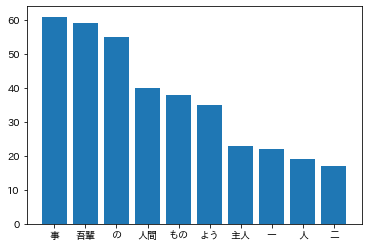

In [49]:
x = list()
for i in range(1,11):
    x.append(i)
top10_word = list()
top10_count = list()
for word, counter in list(neco_counter.items())[:10]:
    top10_word.append(word)
    top10_count.append(counter)
plt.bar(x, top10_count, tick_label=list(top10_word))
plt.show()

## 38.ヒストグラム
単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

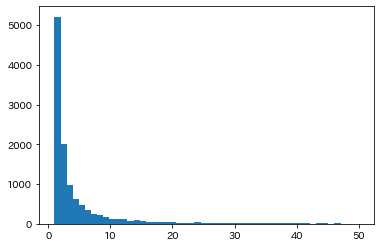

In [107]:
import collections
import numpy as np

x = list()
top_word = list()
top_count = list()
for word, counter in list(word_freq.items()):
    top_count.append(counter)
top_count.sort(reverse=True)
plt.hist(top_count, bins=50, range=(1,50))
plt.show()

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

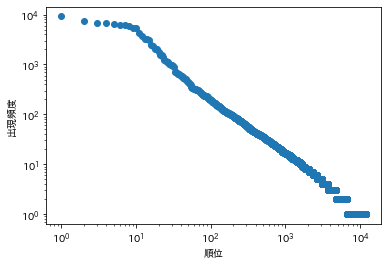

In [114]:
X = range(1,len(word_freq)+1)
Y = list(word_freq.values())
plt.scatter(X,Y)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("順位")
plt.ylabel("出現頻度")
plt.show()